# TP 1: Introduction à python et analyse en fréquence de signaux sonores.

- Python est un langage multiusage qui est libre et qui peut être utilisé comme substitut à matlab, notamment en utilisant la librairie numpy. C'est d'ailleurs un langage de plus en plus utilisé (dans les trois premiers utilisés).
- Jupyter notebook: est une interface qui permet d'écrire du code, de le faire exécuter, d'écrire du texte. C'est ce qu'on utilise maintenant pour le TP. 
- Pour utiliser python et les notebooks, on conseille d'installer la distribution de python anaconda avec python 3.

## 1. Introduction très rapide à python.

In [1]:
# import des librairies scientifiques numpy et scipy
import numpy as np
import scipy as sp
# pour exécuter la cellule, faire "shift+entrée".

In [2]:
# déclarer une liste
liste = []
# faire une boucle pour remplir la liste:
for i in range(10):
    # remarquer que l'indentation est 
    liste.append((i,str(i)))
# écrire la liste:
print(liste)
# sélectionner une entrée de la liste:
print(liste[0]) 
# noter que l'indice commence à 0 en python à la différence de matlab.

[(0, '0'), (1, '1'), (2, '2'), (3, '3'), (4, '4'), (5, '5'), (6, '6'), (7, '7'), (8, '8'), (9, '9')]
(0, '0')


In [3]:
# Utiliser numpy pour faire des calculs sur des vecteurs.
a = np.arange(10)
print(a)
# multiplication terme à terme:
print(a*a)
# multiplication matricielle
M = np.ones((10,10))
print(np.dot(M,a))

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]
[45. 45. 45. 45. 45. 45. 45. 45. 45. 45.]


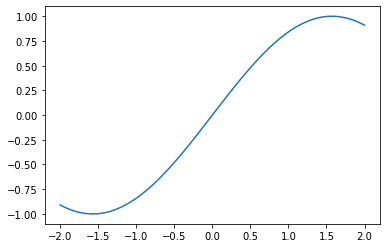

In [4]:
# utiliser la librairie pylab pour tracer des graphes.
import pylab as pl
x = np.linspace(-2,2,300) # 300 points équidistribués sur [-2,2]
y = np.sin(x) # calcule le vecteur des sinus des points de x.
pl.plot(x,y)
pl.show()

### Pour créer une fonction, boucle ou autre, faire bien attention à l'indentation. Voir l'exemple ci-dessous. Dans ce TP, on utilisera 


In [5]:
# on définit une fonction.
def hello(toto):
    if type(toto)==str:
        print("Hello "+toto)
    elif type(toto)==int:
        for i in range(toto):
            print("Hello")
    else: 
        print("exception")
    return None
hello("toto"); hello(2); hello([1,2])

Hello toto
Hello
Hello
exception


## 2. Introduction à la FFT.
### On va utiliser la fft sur un signal 1D pour en regarder le contenu en fréquentiel.

500


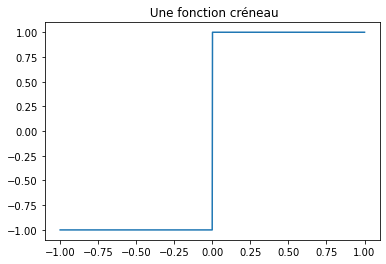

In [6]:
# Choose a grid x and a signal y
n = 1000
m = int(n/2)
print(m)
x = np.linspace(-1,1,n)
y = np.zeros_like(x)
y[m:] = 1
y[0:m] = -1
pl.plot(x,y)
pl.title(" Une fonction créneau");

In [7]:
import scipy.fftpack as sf
# On utilise la fonction fft pour calculer la transformée de Fourier.
spectre = sf.fft(y)
# on utilise la fonction ifft pour calculer l'inverse.
inverse_du_spectre = sf.ifft(spectre)

### Exercice 1: 
+ Calculer la norme $L^2$ du signal et la norme $L^2$ de sa transformée de Fourier.
+ On vérifiera que la fft et l'inverse de la ftt sont bien inverses numériques. 

In [8]:
 
def compute_dot(s1, s2):
    dot = 0
    n = len(s1)
    for i in range(n):
        dot += s1[i] * np.conj(s2[i])
    return dot

def compute_ltwo_norm(s) :
    return compute_dot(s, s)

print(compute_ltwo_norm(y))
print(compute_ltwo_norm(spectre))
print(compute_ltwo_norm(inverse_du_spectre))

1000.0
(1000000.0000000005+0j)
(1000+0j)


Text(0.5, 1.0, ' La fréquence nulle est au milieu.')

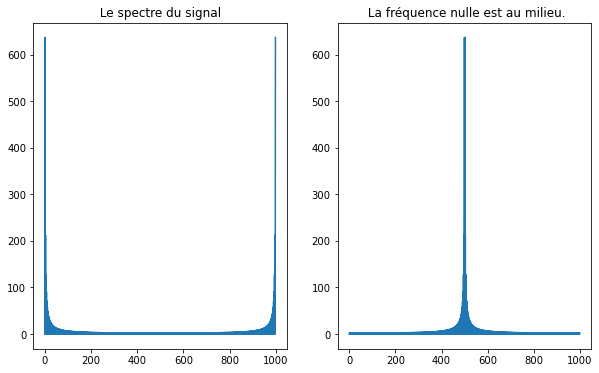

In [9]:
# illustration.
pl.figure(figsize = (10,6))
pl.subplot(1,2,1)
pl.plot(np.abs(spectre))
pl.title(" Le spectre du signal ")
pl.subplot(1,2,2)
pl.plot(np.abs(sf.fftshift(spectre)))
pl.title(" La fréquence nulle est au milieu.")

### Exercice 2: 
+ lisez le code ci-dessous et expliquez ce qui est obtenu.

###
+ On coupe des fréquences dans la transformée, avant de reconstruire un signal où il « manque » ces composantes fréquencielles.

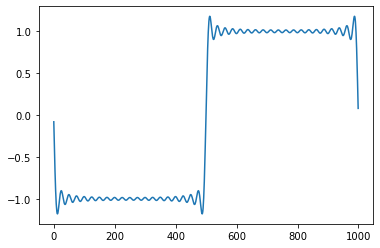

In [10]:
reduced = np.copy(spectre)
h = 40
reduced[h:n-h] = 0
reconstruct=sf.ifft(reduced)
pl.plot(np.real(reconstruct))

### Exercice 3: 
+ Créer une gaussienne en utilisant la formule $e^{-x^2/\sigma^2}$ et tracer la transformée de Fourier de cette fonction.

Text(0.5, 1.0, 'Transformée de Fourier de la gaussienne.')

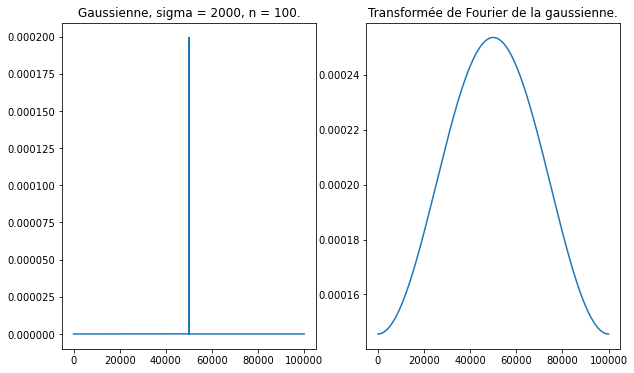

In [11]:
def compute_gaussian(sigma, n, step):
    return (1 / (sigma * np.sqrt(2 * np.pi))) \
            * np.exp( - (1 / 2 * sigma * sigma)
                     * np.power(np.arange(-n / 2, n / 2, step), 2))

sigma = 2000
n = 100
step = 0.001
g = compute_gaussian(sigma, n, step)

pl.figure(figsize = (10,6))
pl.subplot(1,2,1)
pl.plot(np.abs(g))
pl.title("Gaussienne, sigma = {}, n = {}.".format(sigma, n))
pl.subplot(1,2,2)
pl.plot(np.abs(sf.fftshift(sf.fft(g))))
pl.title("Transformée de Fourier de la gaussienne.")

### On va créer un signal de type sinusoidal numérique, qu'on va ensuite écouter.

In [12]:
fs = 44100 # fq d'échantillonage
T = 2 # duree du signal en secondes
fq = 440

points = np.arange(0,T * fs)/fs
y = 20*np.cos(2*np.pi*fq * points)

In [13]:
from IPython.display import Audio
Audio(10*y, rate = 44100)

### Exercice 4: 
+ Représenter le signal sur 2 dixièmes de seconde et compter le nombre de maximums pour en vérifier approximativement la fréquence du signal.
+ En utilisant la fft, représenter le contenu fréquentiel du signal. On s'attend à avoir un pic localisé en la fréquence utilisée pour la définition du signal.


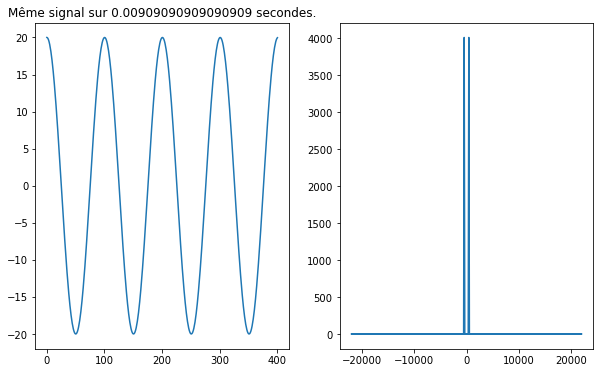

In [14]:
T2 = 1 / 110
y2 = y[:int(T2 * fs) + 1]

pl.figure(figsize = (10,6))
pl.subplot(1,2,1)
pl.plot(y2)
pl.title("Même signal sur {} secondes.".format(T2))

y_tf = sf.fft(y)

y2_tf = sf.fft(y2)

freqs2 = sf.fftfreq(y2_tf.size, 1 / fs)
pl.subplot(1,2,2)
pl.plot(freqs2, np.abs(y2_tf))


###
+ On observe fq = 4 × 110 = 440

In [15]:


## y_fft est dans [-fe, fe], le maximum est en double.
estimation_fq = np.argmax(y_tf) / 2
message = "La fréquence pour laquelle la transformée de Fourier est maximale est {} Hz".format(estimation_fq)
print(message)

La fréquence pour laquelle la transformée de Fourier est maximale est 440.0 Hz


### Exercice 5:
+ En utilisant la fonction np.argmax, détecter la position du maximum de la fft du signal.
+ Traduire cette position en fréquence.

## 3. Étude de signaux réels:
### On retrouve bien, dans ce cas, la fréquence du son qu'on a créé. On propose de faire la même chose pour un fichier son, qui est l'enregistrement d'une note de musique. On importe un fichier son, on lit la fréquence d'échantillonnage. Le signal étant stéréo, il y a, dans le même vecteur les deux sons concaténés: 

In [16]:
from scipy.io import wavfile
fs, data = wavfile.read('res/piano.wav')
print("la frequence est ",fs," donc 1 seconde du signal correspond à ",fs, " points")
print("la longueur du signal numerique mono est ",len(data)//2)

## On remet le signal à la dimension du "vrai" son.
data_stereo = np.reshape(data,(np.size(data)//2,2))
signal_mono = 0.5 * np.sum(data_stereo,axis = 1)
print("la longueur du signal mono en secondes est ", len(signal_mono)//fs)

la frequence est  44100  donc 1 seconde du signal correspond à  44100  points
la longueur du signal numerique mono est  460800
la longueur du signal mono en secondes est  20


### Exercice 6: 
+ Écouter le signal.
+ Le représenter en fonction du temps.
+ Représenter sa transformée de Fourier.
+ Que constatez-vous sur le spectre du signal ?

Text(0.5, 1.0, 'Signal transformé.')

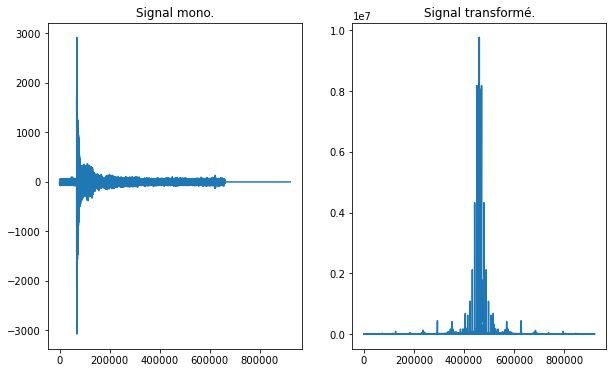

In [17]:
signal_mono_tf = sf.fft(signal_mono)

pl.figure(figsize = (10,6))
pl.subplot(1,2,1)
pl.plot(signal_mono)
pl.title("Signal mono.")
pl.subplot(1,2,2)
pl.plot(np.abs(sf.fftshift(signal_mono_tf)))
pl.title("Signal transformé.")

###
+ Spectre aux pics espacés régulièrement : unique son harmonique. Confirmé par l'écoute, il n'y a qu'une note de jouée.

### FFT sur une sous partie du signal.
### Exercice 7:
+ Estimer l'instant où le son apparait.
+ Effectuer le même travail que précédemment pour une sous partie du signal: on prendra le signal fenêtré sur une longueur de $T$ secondes. Par exemple, $1.5$ secondes.

Le son apparaît à 1.5627210884353742 secondes.


Text(0.5, 1.0, 'Signal fenêtré transformé.')

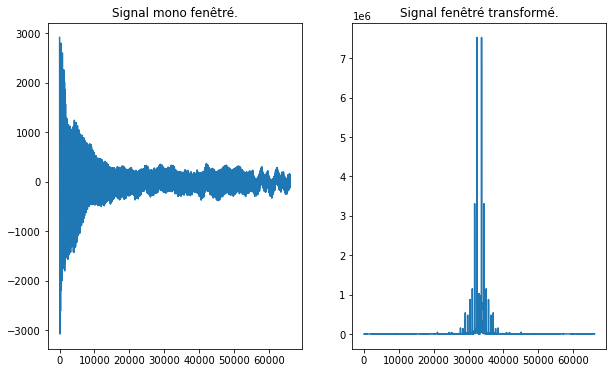

In [18]:
# On ignore le temps « d'attaque », et on considère 
# que le son apparaît quand son volume est maximal.

t_commence = np.argmax(signal_mono) / fs

# Pour faire mieux, on pourrait calculer la dérivée temporelle, et considérer
# que le son apparaît quand la dérivée est maximale (taux d'accroissement la plus élevé.)

print("Le son apparaît à {} secondes.".format(t_commence))

T2 = 1.5
s_fen = signal_mono[int(t_commence * fs) :int((t_commence + T2) * fs)]
s_fen_tf = sf.fft(s_fen)

pl.figure(figsize = (10,6))
pl.subplot(1,2,1)
pl.plot(s_fen)
pl.title("Signal mono fenêtré.")
pl.subplot(1,2,2)
pl.plot(np.abs(sf.fftshift(s_fen_tf)))
pl.title("Signal fenêtré transformé.")


### Pour éviter de polluer le spectre avec les discontinuités aux bords avec les conditions périodiques de la FFT, on multiplie le signal fenêtré avec une fonction qui décroit vers $0$ aux bords de la fenêtre. Voir ci-dessous. 

66150
66150


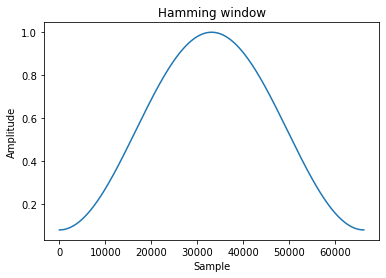

In [19]:
## On introduit une fenetre sur laquelle on va calculer la fft.
import scipy.signal as sig

start = fs * 2
length = int(fs * 1.5)
print(length)### on considère un nombre d'échantillons d'une durée équivalente de 1.5 seconde
slices = np.arange(start, start + length, 1) # np.arange > slice
window = sig.hamming(length)
print(np.size(window))

pl.plot(window)
pl.title("Hamming window")
pl.ylabel("Amplitude")
pl.xlabel("Sample")
pl.show()

### Exercice 8: 
+ Comparer la différence entre la fft du signal fenêtré et la fft du signal fenêtré et multiplié par la fonction de Hamming introduite ci-dessus.

L2 err: 0.0


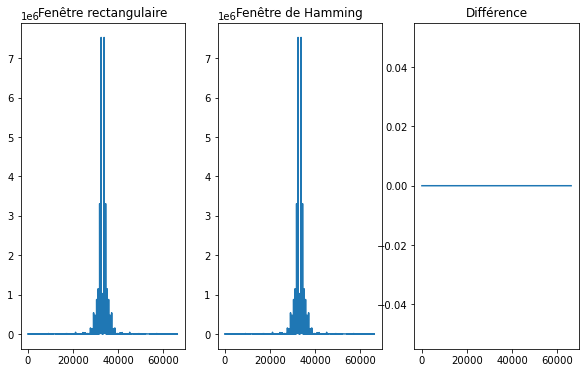

In [20]:
# s_fen_tf

# comparer la différence ? mmmm...
# On multiplie dans le domaine temporel.
# Cela correspond à une convolution dans le domaine fréquentiel.
s_fen_ham = np.multiply(s_fen, window)

s_fen_ham_tf = sf.fft(s_fen)

# on nous demande une difference on prendra la norme l1
#  Important: la phase n'a pas d'influence sur le graphe de
# la valeur absolue de la transformée du signal
diff = np.abs(np.add(s_fen_ham_tf, - s_fen_tf))

err = np.sum(diff * diff)

print("L2 err: {}".format(err))


pl.figure(figsize = (10,6))
pl.subplot(1,3,1)
pl.plot(np.abs(sf.fftshift(s_fen_tf)))
pl.title("Fenêtre rectangulaire")
pl.subplot(1,3,2)
pl.plot(np.abs(sf.fftshift(s_fen_ham_tf)))
pl.title("Fenêtre de Hamming")
pl.subplot(1,3,3)
pl.plot(sf.fftshift(diff))
pl.title("Différence")

pl.show()

On constate que l'introduction d'une fenêtre temporelle de Hamming n'a aucun effet sur le spectre. Notre cas est particulier, car en général il y aurait une petite différence, on aurait réduit la discontinuité aux bords à $t = 0$ et $t = 1.5$.

### Exercice 9: On considère le signal ci-dessous qui est la prononciation d'une conçonne, un "s".
+ Que pouvez-vous dire du contenu fréquentiel du signal ?
+ Est-ce que la localisation d'une fréquence dominante a du sens dans ce cas ?

In [21]:
from scipy.io import wavfile
fs, data = wavfile.read('res/sss.wav')
print("la frequence est ",fs," donc 1 seconde du signal correspond à ",fs, " points")
print("la longueur du signal numerique mono est ",len(data)//2)
print("la forme du signal est "+str(np.shape(data)))
## On remet le signal à la dimension du "vrai" son.
data_stereo = np.reshape(data,(np.size(data)//2,2))
signal_mono =  0.5 * np.sum(data_stereo,axis = 1) # ici il on normalise.
print("la longueur du signal mono en secondes est ", len(signal_mono)//fs)

la frequence est  44100  donc 1 seconde du signal correspond à  44100  points
la longueur du signal numerique mono est  25863
la forme du signal est (51727, 2)
la longueur du signal mono en secondes est  1


In [22]:
from IPython.display import Audio
Audio(signal_mono, rate = 44100)

Text(0.5, 1.0, 'sssss')

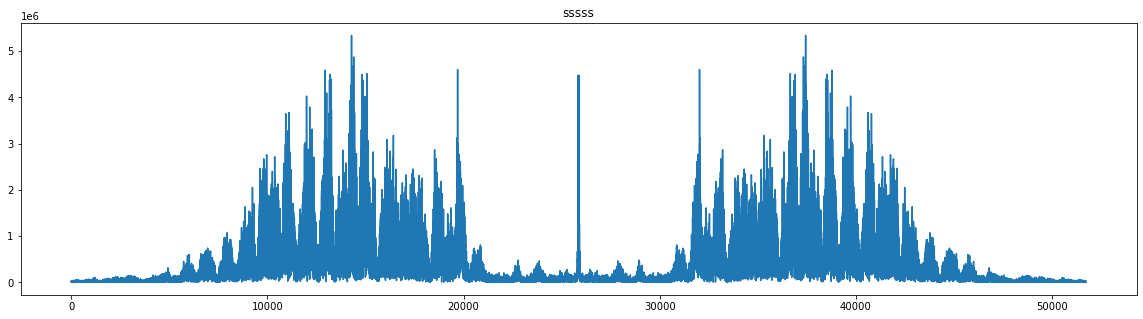

In [23]:
s_tf = sf.fft(signal_mono)


pl.figure(figsize = (20,5))
pl.plot(np.abs(sf.fftshift(s_tf)))
pl.title("sssss")

On n'a pas un spectre « à raies », mais on peut quand même observer des maxima locaux à un intervalle relativement régulier. On ne peut pas à proprement parler de « fréquence dominante », mais on peut parler de fréquence fondamentale : la fréquence génératrices de ces pseudo-harmoniques.

## 4. Le théorème de Shannon

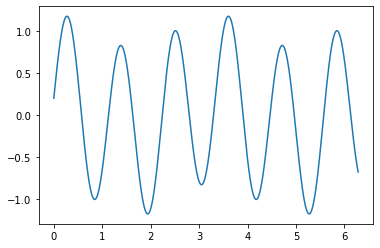

In [24]:
## On définit un signal
def mySignal(t):
    fq = 0.9
    fq2 = 0.3
    return np.sin(2*np.pi * fq*t) + 0.2*np.cos(2*np.pi * fq2*t)
x = np.linspace(0,2*np.pi,1000)
pl.plot(x,mySignal(x))
pl.show()

### Exercice 10: 
+ Choisissez un temps d'interpolation $T_e$ et montrer la reconstruction du signal en utilisant une interpolation linéaire, c'est-à-dire des segments entre les points de la courbe.
+ Implémenter la formule d'interpolation de Shannon et comparer avec l'interpolation linéaire; changer de forme de signal.

In [102]:
def interpolate_segments(s_num, Te_analog, ts_analog):
    N = s_num.shape[0]
    ts_num = np.arange(N)
    get_first_index  = lambda t_analog : int(t_analog / Te_analog)
    get_first_weight = lambda t_analog : 1 - (t_analog - get_first_index(t_analog) * Te_analog) / Te_analog
    def func(t_analog):
        i = get_first_index(t_analog)
        if i > N - 1:
            i = N - 1
        w = get_first_weight(t_analog)
        j = 0
        if i == N - 1:
            j = i
        else:
            j = i + 1
        return s_num[i] * w + s_num[j] * (1 - w)
    return np.array(list(map(func, ts_analog)))

def interpolate_shannon(s_num, Te_analog, ts_analog):
    # if Te >= 1 / (2 * fc):
    #    raise ValueError("Te should be compliant with the Shannon condition.")
    N = s_num.shape[0]
    ts_num = np.arange(N) * Te_analog
    sinc_shift = lambda t_analog : np.sinc((t_analog - ts_num) / Te_analog)
    func = lambda t_analog : np.sum(np.multiply(s_num, sinc_shift(t_analog)))
    return np.array(list(map(func, ts_analog)))

In [132]:
Te  = 1 # en secondes
N = 1000

# valeurs plus petite pour constater l'erreur de l'interpolation en segments
Te_analog = 0.1
N_analog = 1000

ts_analog = np.arange(N_analog) * Te_analog

s_num = np.array(list(map(mySignal, ts_analog)))

s_shannon  = interpolate_shannon(s_num, Te_analog, ts_analog)
s_segments = interpolate_segments(s_num, Te_analog, ts_analog)

err_shannon = np.sum(np.abs(np.add(s_num, - s_shannon)) ** 2)
err_segments = np.sum(np.abs(np.add(s_num, - s_segments)) ** 2)


Erreur par segments:  1.802119203324098e-26
Erreur par Shannon:   1.735312786000964e-24


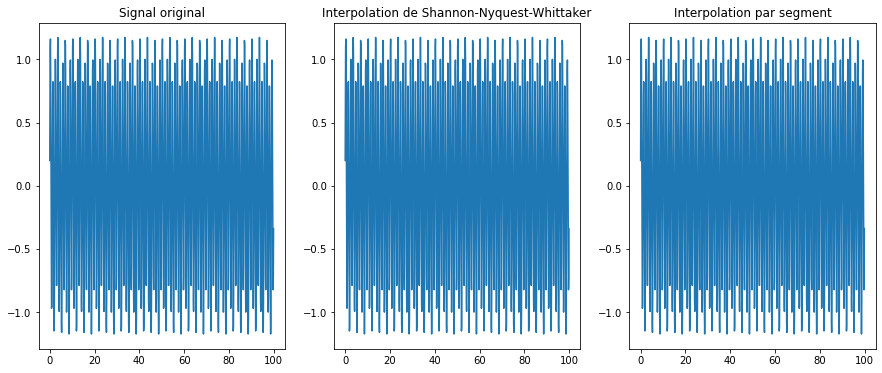

In [133]:
pl.figure(figsize = (15,6))

print("Erreur par segments: ", err_segments)
print("Erreur par Shannon:  ", err_shannon)

pl.subplot(1,3,1)
pl.plot(ts_analog, s_num)
pl.title("Signal original")

pl.subplot(1,3,2)
pl.plot(ts_analog, s_shannon)
pl.title("Interpolation de Shannon-Nyquest-Whittaker")

pl.subplot(1,3,3)
pl.plot(ts_analog, s_segments)
pl.title("Interpolation par segment")

pl.show()